bootstrapping: https://www.youtube.com/watch?v=smprgGyp3mc 
monte carlo integration: https://www.youtube.com/watch?v=3j3b81vELcA

Sample Size: 7
Sample Mean: 64.71428571428571
Standard Error: 1.3354943974851732
95.0 % CI: ( 62.285714285714285 , 67.42857142857143 )


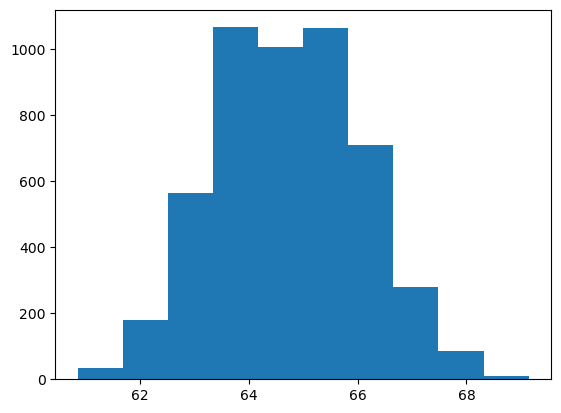

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sample of adult female heights
os = np.array([60,62,62,66,64,69,70])

#initialize some variables
N = 5000
sampleSize = len(os)
xBar = np.average(os)
conf = 0.95

bDist = np.zeros(N)


lower = int(N*(1 - conf)/2) - 1
upper = N - lower

# do random sampling from our original sample with replacement
# store the bootstrap sample means into an array
# SE is the standrad deviation of sample means
# print out original mean, SE, CI(percentile), show histogram
for i in range(N):
    bSample = np.random.choice(os, sampleSize, replace=True)
    bDist[i] = np.average(bSample)
    
bDist = np.sort(bDist)
SE = np.std(bDist)
print("Sample Size:", sampleSize)
print("Sample Mean:", xBar)
print("Standard Error:", SE)

print(100*conf, "% CI: (", bDist[lower], ",", bDist[upper], ")")

plt.figure(1)
plt.hist(bDist)
plt.show()

Sample Size: 22
Sample Mean: 0.36363636363636365
Standard Error: 0.1027662351694811
90.0 % CI: ( 0.18181818181818182 , 0.5454545454545454 )


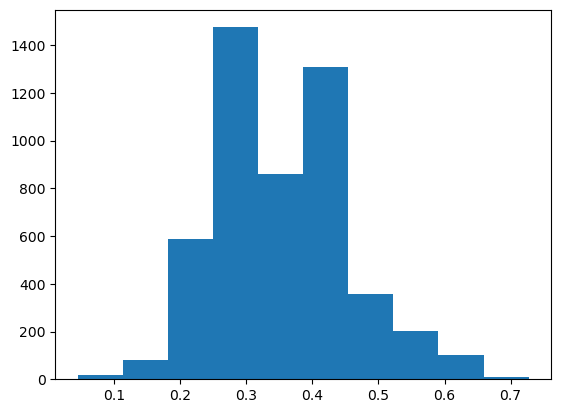

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sample of adult female heights
os = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

#initialize some variables
N = 5000
sampleSize = len(os)
pHat = np.average(os)
conf = 0.90

bDist = np.zeros(N)


lower = int(N*(1 - conf)/2) - 1
upper = N - lower

# do random sampling from our original sample with replacement
# store the bootstrap sample means into an array
# SE is the standrad deviation of sample means
# print out original mean, SE, CI(percentile), show histogram
for i in range(N):
    bSample = np.random.choice(os, sampleSize, replace=True)
    bDist[i] = np.average(bSample)
    
bDist = np.sort(bDist)
SE = np.std(bDist)
print("Sample Size:", sampleSize)
print("Sample Mean:", pHat)
print("Standard Error:", SE)

print(100*conf, "% CI: (", bDist[lower], ",", bDist[upper], ")")

plt.figure(1)
plt.hist(bDist)
plt.show()

In [13]:
import numpy as np

#define my function
def f(x):
    return x**2

#approx integral from a=0 to b=1 of x**2 which is 1/3
#limits of integration
a = 0
b = 1

#num of random samples
N = 5000

#randomly draw from a uniform distribution
xs = np.random.uniform(low=a, high=b, size=N)
f = f(xs)
fHat = np.average(f)
err = np.std(f)/np.sqrt(N)

#estimate integral
iHat = (b-a)*fHat
low = iHat - 1.96*err
high = iHat + 1.96*err

#output
print("Integral Estimate:", iHat)
print("Error Estimate:", err)
print("95% CI:(",low,",",high,")")

Integral Estimate: 0.3345280879880039
Error Estimate: 0.004222547196301064
95% CI:( 0.3262518954832538 , 0.34280428049275397 )


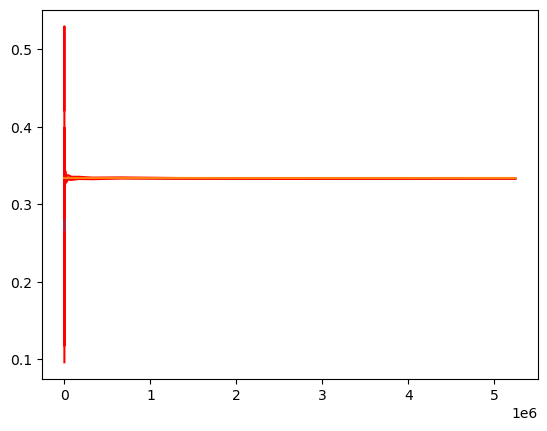

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x ** 2

#define some variables
a = 0
b = 1

numApprox = 20
iHat = np.zeros(numApprox)
uError = np.zeros(numApprox)
lError = np.zeros(numApprox)
Ns = np.zeros(numApprox)
N = 10

for i in range(numApprox):
    Ns[i] = N 
    xs = np.random.uniform(low=a, high=b, size=N)
    randFun = f(xs)
    fHat = np.average(randFun)
    err = np.std(randFun)/np.sqrt(N)
    iHat[i] = (b - a) * fHat
    uError[i] = iHat[i] + 1.96 * err
    lError[i] = iHat[i] - 1.96 * err
    N = N * 2
   
#plot the values
actual = 1/3 * np.ones(numApprox)
plt.figure(1)
plt.plot(Ns, iHat)
plt.plot(Ns, uError, '-r')
plt.plot(Ns, lError, '-r')
plt.plot(Ns, actual)
plt.show()


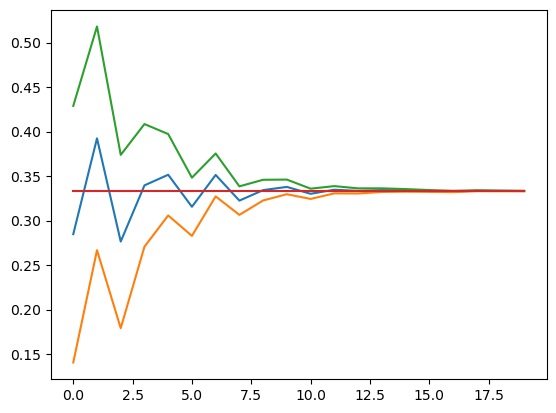

In [31]:
plt.plot(iHat)
plt.plot(lError)
plt.plot(uError)
plt.plot(actual)

1. Use bootstrapping to estimate a 90%, 95%, and 99% confidence interval for average daily internet usage, in hours, for all countries in the world, given a sample of countries average daily usage of: Swizerland, 4.97; United States, 6.52; Germany, 4.62; Australia, 5.07; United Kingdom, 5.77; France, 4.63; Spain, 4.3; Italy, 6.07; Brazil, 9.29. What potential issues do you see with using these countries to estimate all global internet usage? Print the sample mean, sampe size, standard error, CIs and Histogram.

Sample Size: 9
Sample Mean: 5.693333333333333
Standard Error: 0.48660623268379527
90.0 % CI: ( 4.978888888888889 , 6.569999999999999 )


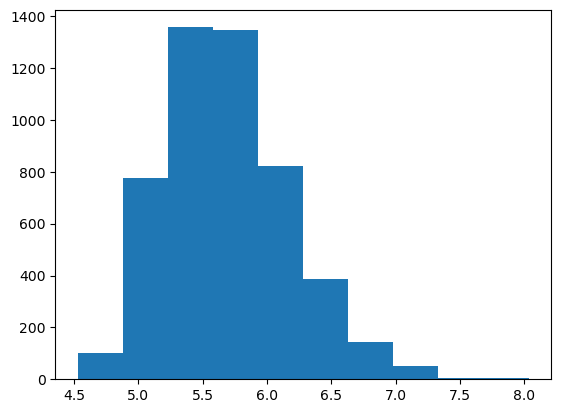

Sample Size: 9
Sample Mean: 5.693333333333333
Standard Error: 0.478391424163968
95.0 % CI: ( 4.893333333333333 , 6.75 )


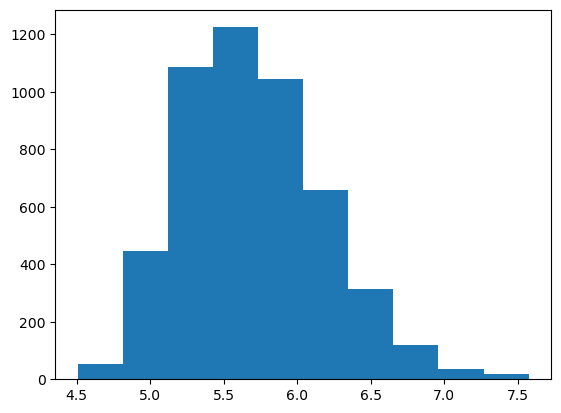

Sample Size: 9
Sample Mean: 5.693333333333333
Standard Error: 0.47829513545348656
99.0 % CI: ( 4.7299999999999995 , 7.085555555555555 )


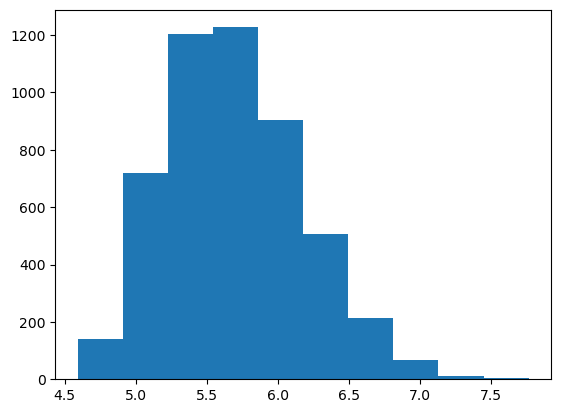

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sample of countries' average daily internet usage, in hours
os = np.array([4.3,4.62,4.63,4.97,5.07,5.77,6.07,6.52,9.29])

#initialize some variables
N = 5000
sampleSize = len(os)
pHat = np.average(os)
bDist = np.zeros(N)


conf = [0.90, 0.95, 0.99]

for c in conf:
    lower = int(N*(1-c)/2) - 1
    upper = N - lower

# do random sampling from our original sample with replacement
# store the bootstrap sample means into an array
# SE is the standrad deviation of sample means
# print out original mean, SE, CI(percentile), show histogram
    for i in range(N):
        bSample = np.random.choice(os, sampleSize, replace=True)
        bDist[i] = np.average(bSample)
    
    bDist = np.sort(bDist)
    SE = np.std(bDist)
    print("Sample Size:", sampleSize)
    print("Sample Mean:", pHat)
    print("Standard Error:", SE)

    print(100*c, "% CI: (", bDist[lower], ",", bDist[upper], ")")

    plt.figure(1)
    plt.hist(bDist)
    plt.show()

2. Use bootstrapping to estimate the proportion of all people who approve of a new law being proposed, if 588 people approve of the new law in a sample of 1500. You will likely want to find a way to make 0s and 1s instead of typing them in by hand. You may find a way using numpys built in functions.

Sample Size: 1500
Sample Proportion: 0.392
Standard Error: 0.012701809432605349
95.0 % CI: ( 0.36733333333333335 , 0.41733333333333333 )


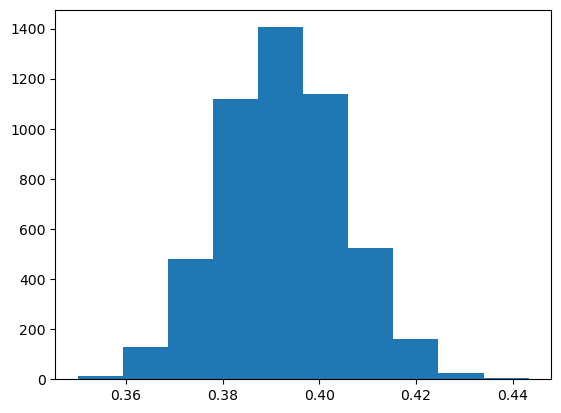

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1 for approval, 0 for disapproval
sample_size = 1500
approval_count = 588

#random sample with 1s (approvals) and 0s (disapprovals)
sample_data = np.concatenate([np.ones(approval_count), np.zeros(sample_size - approval_count)])

#initialize variables
N = 5000
sampleSize = len(sample_data)
pHat = np.mean(sample_data)
conf = 0.95

bDist = np.zeros(N)

lower = int(N * (1 - conf) / 2) - 1
upper = N - lower

# Do random sampling from our original sample with replacement
# Store the bootstrap sample means into an array
# SE is the standard deviation of sample means
# Print out original mean, SE, CI (percentile), show histogram
for i in range(N):
    bSample = np.random.choice(sample_data, sampleSize, replace=True)
    bDist[i] = np.mean(bSample)

bDist = np.sort(bDist)
SE = np.std(bDist)
print("Sample Size:", sampleSize)
print("Sample Proportion:", pHat)
print("Standard Error:", SE)

print(100*conf, "% CI: (", bDist[lower], ",", bDist[upper], ")")

plt.figure(1)
plt.hist(bDist)
plt.show()

3. A difficult integral to calculate is the $Si(x)=\int_{0}^{x}\frac{\sin(t)}{t}dt$ a famous case is the Dirichlet integral, which you can look up if you would like. Use Monte Carlo integration techniques to estimate $Si(2)$. Find a 95% confidence interval for the true value of the integral. Find an appropriate number of random samples that gives you an error estimate of less than 0.001.

In [14]:
import numpy as np

#define my function
def f(x):
    return np.sin(x)/x

#approx integral from a=0 to b=1 of x**2 which is 1/3
#limits of integration
a = 0
b = 2

#num of random samples
N = 5000

#randomly draw from a uniform distribution
xs = np.random.uniform(low=a, high=b, size=N)
f = f(xs)
fHat = np.average(f)
err = np.std(f)/np.sqrt(N)

#estimate integral
iHat = (b-a)*fHat
low = iHat - 1.96*err
high = iHat + 1.96*err

#output
print("Integral Estimate:", iHat)
print("Error Estimate:", err)
print("95% CI:(",low,",",high,")")

Integral Estimate: 1.6029273589780124
Error Estimate: 0.0023654825304141665
95% CI:( 1.5982910132184007 , 1.607563704737624 )


4. Find estimates for the integral $$\int_{0}^{\pi} \frac{e^x\sin(x)}{x+1}dx$$ Use $N=100,1000,2000,5000,10000,25000,50000$ for the number of random samples. Calcualte the error for each of these and plot the estimate $\hat{I}$ and the error bars for a 95% confidence interval on the same plot. You can calcualte these as $\hat{I}\pm 1.96 e_N$. Be sure to label each.

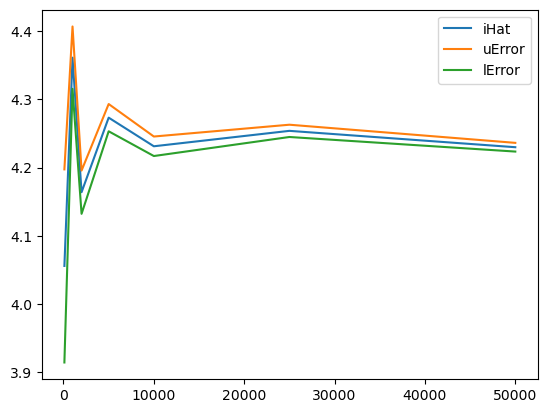

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return (np.exp(x)*np.sin(x))/(x+1)

# define some variables
a = 0
b = np.pi


N = np.array([100, 1000, 2000, 5000, 10000, 25000, 50000])
numApprox = 7
iHat = np.zeros(numApprox)
uError = np.zeros(numApprox)
lError = np.zeros(numApprox)
Ns = np.zeros(numApprox)

for i in range(numApprox):
    Ns[i] = N[i]
    xs = np.random.uniform(low=a, high=b, size=N[i])
    randFun = f(xs)
    fHat = np.average(randFun)
    err = np.std(randFun) / np.sqrt(N[i])
    iHat[i] = (b-a) * fHat
    uError[i] = iHat[i] + 1.96*err
    lError[i] = iHat[i] - 1.96*err


plt.figure(1)
plt.plot(Ns, iHat, label="iHat")
plt.plot(Ns, uError, label="uError")
plt.plot(Ns, lError, label="lError")
plt.legend()
plt.show()